In [2]:
import pandas as pd
from utils import make_plot, rmse  

In [3]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
# log_file_path = 'extension.log'
log_file_path = 'thrust_cbf.log'
log_file_path = 'circle_flat_accuracy.log'
log_file_path = 'circle_nonlinear_accuracy.log'
log_file_path = '/home/factslabegmc/final_wardi_files/build/quad_mpc/quad_mpc/data_analysis/circle_mpc_accuracy.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,ctrl_callback_time_history,metadata
0,7.152557e-07,0.017819,0.017500,0.084410,0.015606,-0.960115,-0.076319,0.032515,-0.099771,0.0,0.0,-0.6,0.0,0.010319,0.011150,Sim
1,1.124930e-02,0.017819,0.017500,0.084410,0.015606,-0.960115,-0.076319,0.032515,-0.099771,0.0,0.0,-0.6,0.0,0.000135,0.000521,1x Speed
2,1.996469e-02,0.017491,0.017194,0.083936,0.015628,-0.959924,-0.071732,0.029107,-0.099914,0.0,0.0,-0.6,0.0,0.000714,0.001342,Horizon:3.0
3,2.991176e-02,0.017380,0.017093,0.083812,0.015623,-0.959866,-0.070698,0.028077,-0.099880,0.0,0.0,-0.6,0.0,0.001125,0.002010,Num Steps:20
4,4.006052e-02,0.017159,0.016897,0.083576,0.015601,-0.959777,-0.069619,0.025693,-0.099742,0.0,0.0,-0.6,0.0,0.001045,0.001853,No Pyjoules


In [4]:
# print(f"This data comes from: {df_log['metadata'][0]}")
# print(f"Predictor was: {df_log['metadata'][1]}")
# print(f"Speed: {df_log['metadata'][2]}")
# print(f"Trajectory: {df_log['metadata'][3]}")
# print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
# print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
# print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
# print(f"RMSE: {rmse(df_log)}")

print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"Trajectory: {df_log['metadata'][3]}")
print(f"Mean NR computation time: {df_log['mpc_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['mpc_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time_history'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time_history'].mean()}")

print(f"RMSE: {rmse(df_log)}")



This data comes from: Sim
Predictor was: 1x Speed
Speed: Horizon:3.0
Trajectory: Num Steps:20
Mean NR computation time: 0.0016783844438441298
Mean NR computation freq: 595.811051316482
Mean callback time: 0.002488208216328895
Mean callback time: 0.002488208216328895
RMSE: 0.5429625254753602


KeyError: 'pred_time'

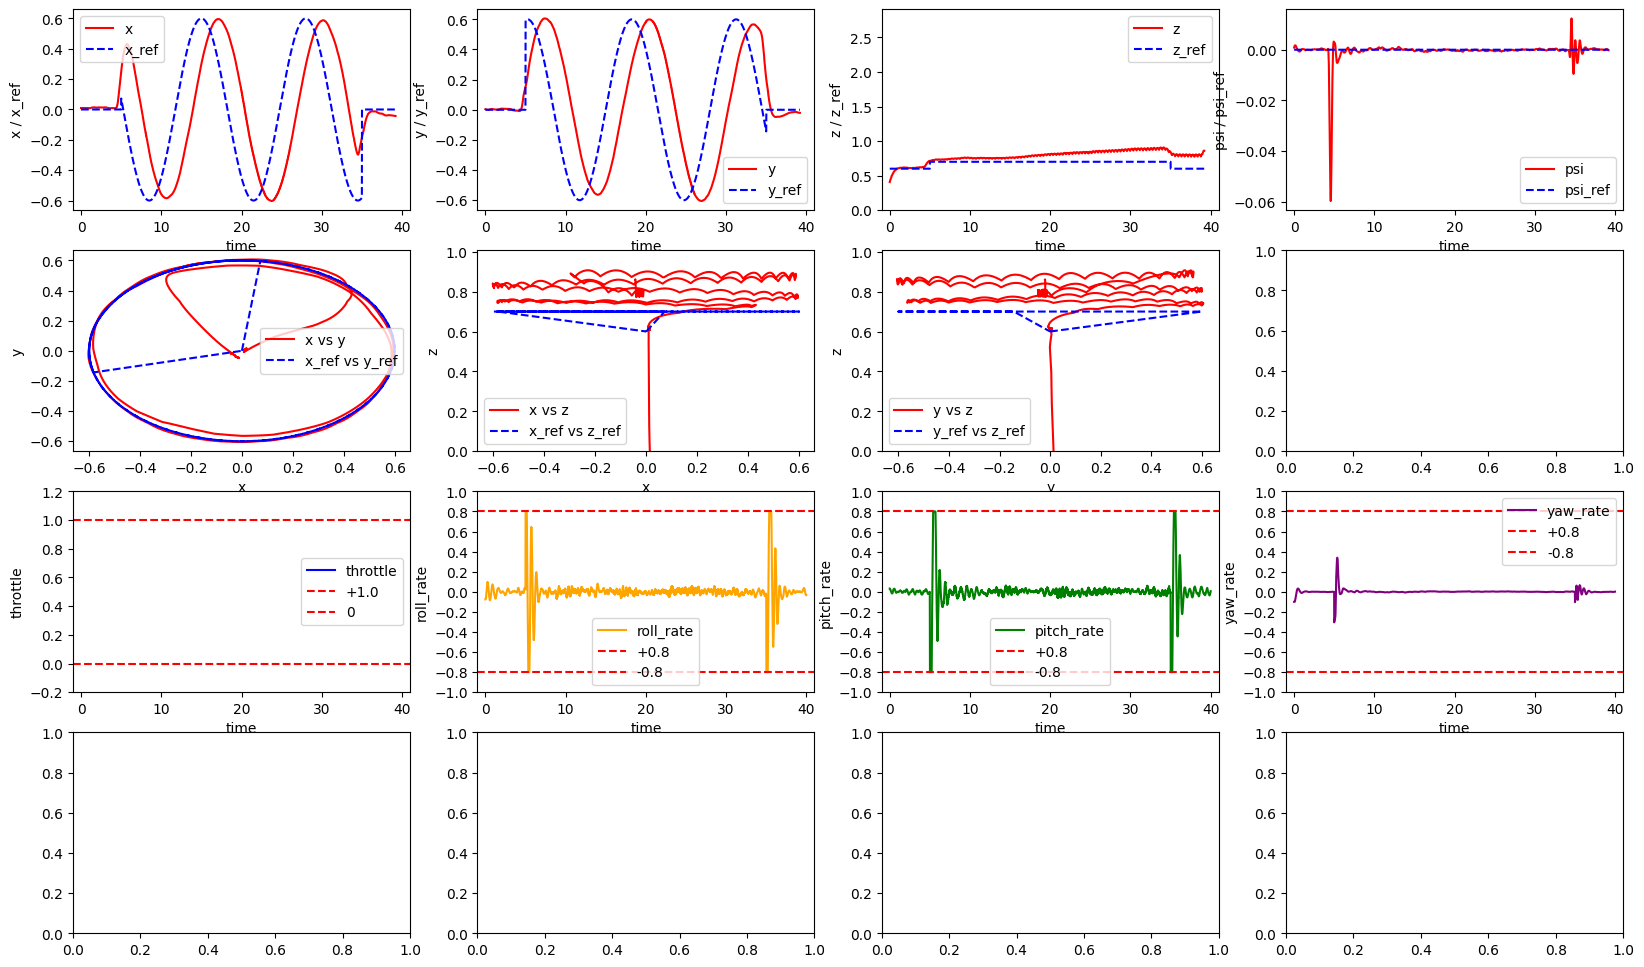

In [5]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)

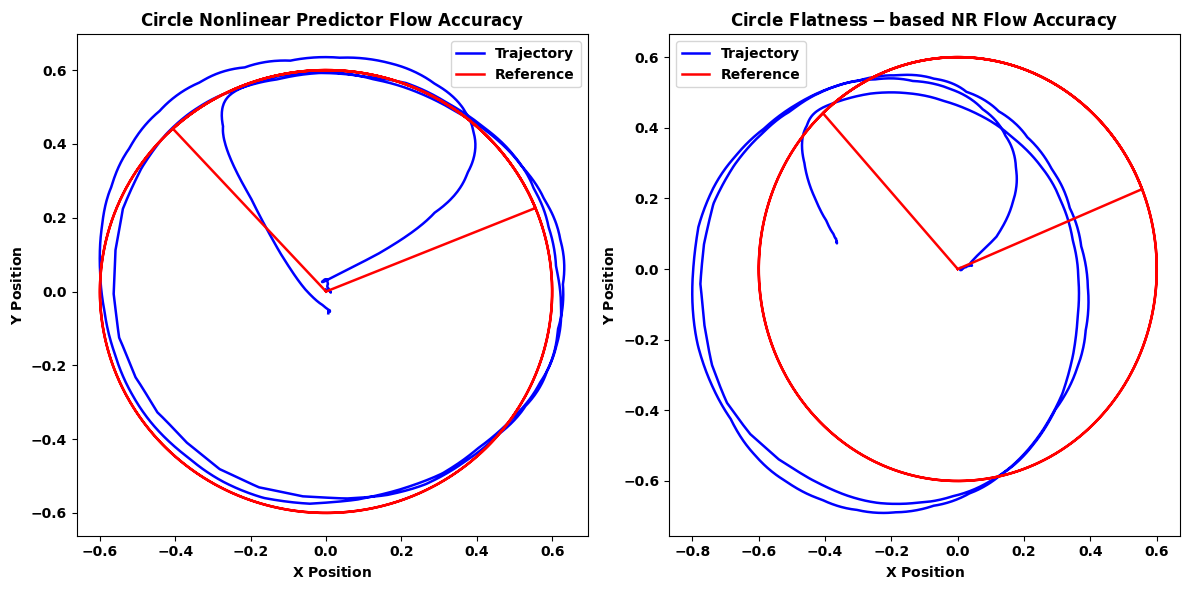

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first subplot
log_file_path = 'circle_nonlinear_accuracy.log'
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})
axs[0].plot(df_log['x'], df_log['y'], label='Trajectory', color='blue', linewidth=1.8)
axs[0].plot(df_log['x_ref'], df_log['y_ref'], label='Reference', color='red', linewidth=1.8)
axs[0].set_title(r'$\mathbf{Circle~Nonlinear~Predictor~Flow~Accuracy}$', fontsize=12)
axs[0].set_xlabel(r'$\mathbf{X~Position}$', fontsize=10)
axs[0].set_ylabel(r'$\mathbf{Y~Position}$', fontsize=10)
axs[0].legend(prop={'weight': 'bold'})

# Plot the second subplot
log_file_path = 'circle_flat_accuracy.log'
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})
axs[1].plot(df_log['x'], df_log['y'], label='Trajectory', color='blue', linewidth=1.8)
axs[1].plot(df_log['x_ref'], df_log['y_ref'], label='Reference', color='red', linewidth=1.8)
axs[1].set_title(r'$\mathbf{Circle~Flatness-based~NR~Flow~Accuracy}$', fontsize=12)
axs[1].set_xlabel(r'$\mathbf{X~Position}$', fontsize=10)
axs[1].set_ylabel(r'$\mathbf{Y~Position}$', fontsize=10)
axs[1].legend(prop={'weight': 'bold'})

# Bold tick labels
for ax in axs:
    ax.tick_params(axis='both', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Save as PDF
plt.tight_layout()
plt.savefig("nonlinvflat_comp.pdf")


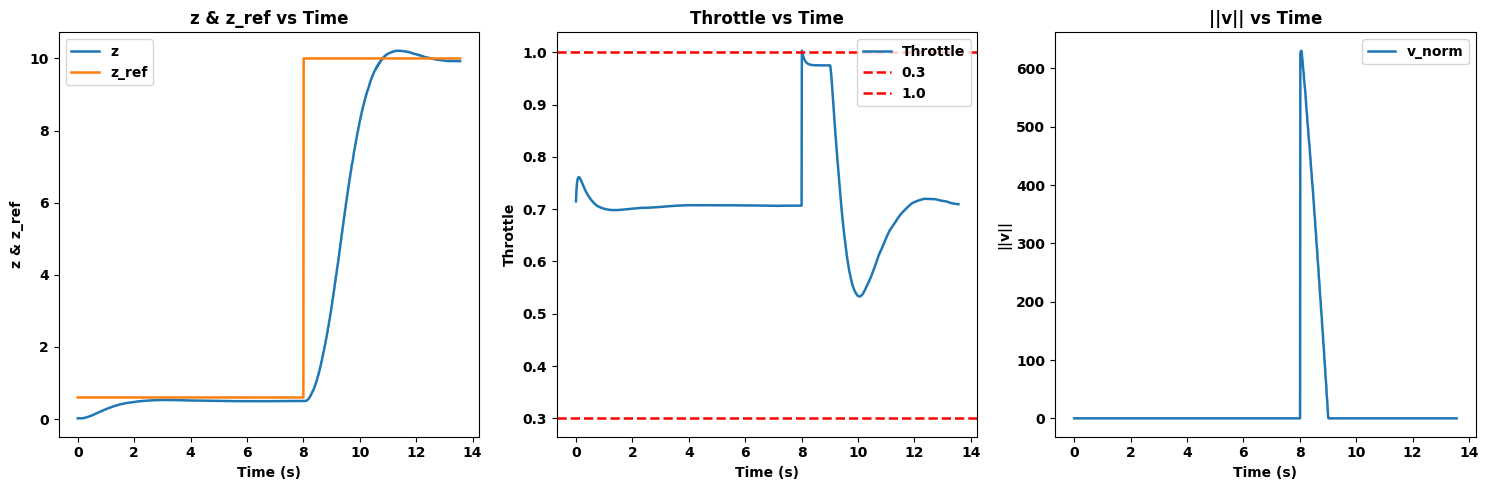

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
log_file_path = 'thrust_cbf.log'
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})


# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot z & z_ref vs time
axs[0].plot(df_log['time'], -df_log['z'], label='z', linewidth=1.8)
axs[0].plot(df_log['time'], -df_log['z_ref'], label='z_ref', linewidth=1.8)
axs[0].set_title('z & z_ref vs Time', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Time (s)', fontsize=10, fontweight='bold')
axs[0].set_ylabel('z & z_ref', fontsize=10, fontweight='bold')
axs[0].legend(prop={'weight': 'bold'})

# Plot throttle vs time
axs[1].plot(df_log['time'], df_log['throttle'], linewidth=1.8, label='Throttle')
axs[1].set_title('Throttle vs Time', fontsize=12, fontweight='bold')
axs[1].set_xlabel('Time (s)', fontsize=10, fontweight='bold')
axs[1].set_ylabel('Throttle', fontsize=10, fontweight='bold')
axs[1].axhline(y=0.3, color='red', linestyle='--', linewidth=1.8, label='0.3')
axs[1].axhline(y=1.0, color='red', linestyle='--', linewidth=1.8, label='1.0')
axs[1].legend(prop={'weight': 'bold'})

# Plot vnorm vs time
axs[2].plot(df_log['time'], df_log['v_norm'], label='v_norm', linewidth=1.8)
axs[2].set_title('||v|| vs Time', fontsize=12, fontweight='bold')
axs[2].set_xlabel('Time (s)', fontsize=10, fontweight='bold')
axs[2].set_ylabel('||v||', fontsize=10, fontweight='bold')
axs[2].legend(prop={'weight': 'bold'})

# Bold tick labels
for ax in axs:
    ax.tick_params(axis='both', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Save as PDF
plt.tight_layout()
plt.savefig("throttle_cbf.pdf")


In [ ]:
import numpy as np
import math as m


In [ ]:
t = np.linspace(0, 60, 400)

In [ ]:
double_speed = True
PERIOD = 13 # used to have w=.5 which is rougly PERIOD = 4*pi ~= 12.56637
PERIOD_Z = 2

if double_speed:
    PERIOD /= 2.0
    PERIOD_Z /= 2.0
w = 2*m.pi / PERIOD
w_z = 2*m.pi / PERIOD_Z

z0 = 0.8
height_variance = 0.3
x = 0.6 * np.cos(w*t)
y = 0.6 * np.sin(w*t)
z = 1*(z0 + height_variance * np.sin(w_z * t))

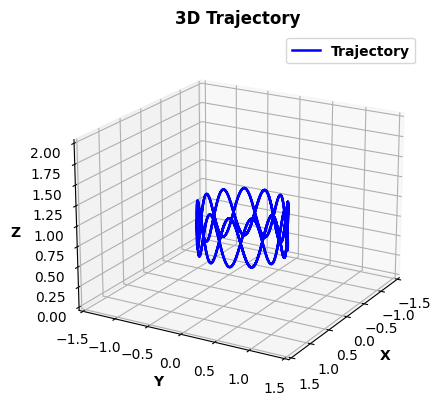

In [ ]:
# do 3d plotting of x, y, z

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import colors as mcolors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Trajectory', fontsize=12, fontweight='bold')
ax.set_xlabel('X', fontsize=10, fontweight='bold')
ax.set_ylabel('Y', fontsize=10, fontweight='bold')
ax.set_zlabel('Z', fontsize=10, fontweight='bold')
# Set the limits for the axes
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([0,2])

#plot
ax.plot(x, y, z, label='Trajectory', color='blue', linewidth=1.8)
ax.view_init(elev=20, azim=30)  # Set the elevation and angle of view
ax.legend(prop={'weight': 'bold'})

In [6]:
import numpy as np

def get_helix_position(t, z0=0.8, z_max=1.3, radius=0.6, num_turns=3, cycle_time=25.0):
    """
    Returns (x, y, z) at time t for a helix with its own up/down cycle time.
    The helix:
      - spirals up from z0 to z_max over cycle_time/2
      - spirals down from z_max to z0 over cycle_time/2
    This repeats independently of any total time duration.
    """
    t_cycle = t % cycle_time
    T_half = cycle_time / 2.0

    if t_cycle <= T_half:
        # Going up
        z = z0 + (z_max - z0) * (t_cycle / T_half)
        progress = (z - z0) / (z_max - z0)  # 0 to 1
    else:
        # Going down
        t_down = t_cycle - T_half
        z = z_max - (z_max - z0) * (t_down / T_half)
        progress = (z - z0) / (z_max - z0)  # 1 to 0

    # Angle is based on how far along this cycle you are
    theta = 2 * np.pi * num_turns * progress
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    return x, y, -z


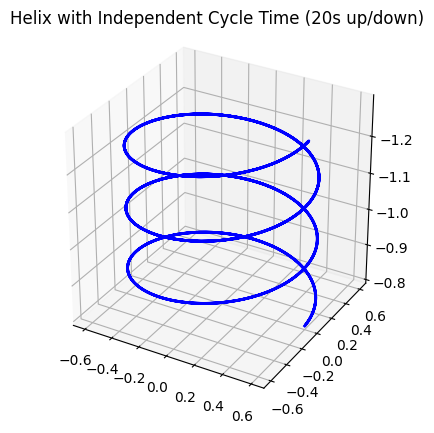

In [7]:
import matplotlib.pyplot as plt

t_vals = np.linspace(0, 45, 1500)  # Run for 90s
x_vals, y_vals, z_vals = [], [], []

for t in t_vals:
    x, y, z = get_helix_position(t, cycle_time=25.0)
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, 'b-', linewidth=2)
ax.set_box_aspect([1, 1, 1])
ax.set_title("Helix with Independent Cycle Time (20s up/down)")
ax.invert_zaxis()


plt.show()


In [9]:
t = np.linspace(0, 0 + 5, 20)
vals = np.array([get_helix_position(i) for i in t])


xs = vals[:, 0]
ys = vals[:, 1]
zs = vals[:, 2]

In [10]:
xs.shape

(20,)

In [11]:
z_vals_np = np.array(z_vals)

In [12]:
z_vals_np

array([-0.8      , -0.8012008, -0.8024016, ..., -1.0024016, -1.0012008,
       -1.       ])

In [ ]:
from scipy.signal import find_peaks
import numpy as np

z_vals_np = np.array(z_vals)
z_max = np.max(z_vals_np)

# Define a tolerance near the actual z_max (to be robust to noise)
tolerance = 1e-3  # or larger if there's noise
peaks, _ = find_peaks(z_vals_np, height=z_max - tolerance)

num_peaks = len(peaks)
print(f"Number of times z reached its max: {num_peaks}")


Number of times z reached its max: 2


In [ ]:
peaks

array([ 416, 1249])

In [ ]:
45/5

9.0

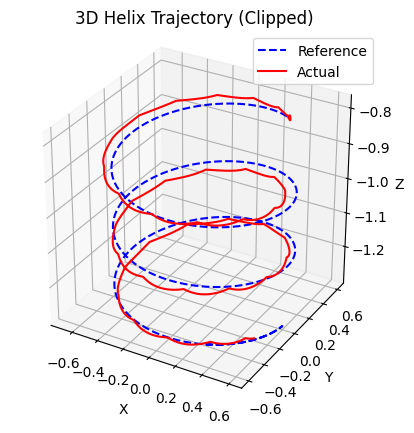

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load data ===
df = pd.read_csv('newhelix.log')

# === Time bounds ===
start_time = df['time'].iloc[0] + 40.0
end_time = df['time'].iloc[-1] - 55.0

# === Clip data to valid window ===
df_clipped = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# === Extract columns ===
x = df_clipped['x']
y = df_clipped['y']
z = df_clipped['z']
x_ref = df_clipped['x_ref']
y_ref = df_clipped['y_ref']
z_ref = df_clipped['z_ref']

# === Plot ===
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(x_ref, y_ref, z_ref, 'b--', label='Reference')
ax.plot3D(x, y, z, 'r-', label='Actual')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Helix Trajectory (Clipped)')
ax.legend()
ax.set_box_aspect([1, 1, 1])
plt.show()
